#### Name: Jahanvi Pareshkumar Mathukia
#### Student ID: 100832165

# Stroke Prognosis

Stroke is a disease related to the arteries located in the vicinty of the brain. It takes place when a oxygen and nutrients carrying blood vessel to the brain either ruptures or is chocked by a clot leading to insufficient presence of blood and oxygen in the brain. Due to this, the brain and it's cells begin to die in few minutes. Some common symptoms of the strokes are experiencing numbness on any part of the body, getting confused by the surroundings or headache. Once you notice such symptoms, immediately seek medical help as many study suggests that 80% of strokes can be prevent death or disability, if diagnosed on time.
In this assignment, I want to analyze what other factors like age, gender and conditions like hypertension, any heart disease and smoking habits may accelerate the possibilty of stroke.

## Methods

### Data Collection

Importing the libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

This dataset contains the survey of 5110 individuals about the odds of the stroke based on different paremeters is present at [Kaggle](https://www.kaggle.com/datasets), a free source of over 1000 datasets.

###### Load the dataset

In [2]:
stroke_dataset = pd.read_csv('stroke.csv')

###### Here is the brief look of the dataset

In [3]:
print(stroke_dataset.shape)
stroke_dataset

(5110, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


###### As the data is unorganised, next I will clean it before I start to analyze.

### Data Cleaning

The stroke dataset had some columns containing extra information that is not required, so, I dropped those columns.

In [4]:
stroke_dataset.drop(["id", "ever_married", "work_type", "Residence_type", "avg_glucose_level", "bmi"], axis=1, inplace = True)

Next, I replaced the binary values in some columns with 'yes' and 'no' where 1 means yes and 0 means no and also changed the age type into integer.

In [5]:
stroke_dataset = stroke_dataset.replace({"hypertension": {1: 'yes', 0 : 'no'}})
stroke_dataset = stroke_dataset.replace({"heart_disease": {1: 'yes', 0 : 'no'}})
stroke_dataset = stroke_dataset.replace({"stroke": {1: 'yes', 0 : 'no'}})

## By using DataFrame method
frame = pd.DataFrame(stroke_dataset)
frame['age'] = frame['age'].astype('int')

Lastly, I looked for any missing data present in the dataset.

In [6]:
stroke_dataset.isnull().sum()

gender            0
age               0
hypertension      0
heart_disease     0
smoking_status    0
stroke            0
dtype: int64

###### So, there is no missing data in the set.

Here is the final dataset and it's summary on what each column means that I will analyze.

1. gender: contains "Male", "Female" or "Other".
2. age: age of the patients whose data is recorded.
3. hypertension: tells whether the patient has hypertension or not.
4. heart_disease: tells whether the patient has any heart diseases or not.
5. smoking_status: tells whether patient "formerly smoked", "never smoked", "smokes" or "Unknown".
6. stroke: tells whether patient had a stroke or not.

In [7]:
stroke_dataset

,gender,age,hypertension,heart_disease,smoking_status,stroke
0,Male,67,no,yes,formerly smoked,yes
1,Female,61,no,no,never smoked,yes
2,Male,80,no,yes,never smoked,yes
3,Female,49,no,no,smokes,yes
4,Female,79,yes,no,never smoked,yes
...,...,...,...,...,...,...
5105,Female,80,yes,no,never smoked,no
5106,Female,81,no,no,never smoked,no
5107,Female,35,no,no,never smoked,no
5108,Male,51,no,no,formerly smoked,no


### Data Analyses

With the exploratory analyses, I will relate each component with the stroke using visualizations and the statistical data.

Numeric summary of the data

In [8]:
stroke_dataset.describe()

,age
count,5110.000000
mean,43.215264
std,22.633866
min,0.000000
25%,25.000000
50%,45.000000
75%,61.000000
max,82.000000


### Distributions

The below histogram represents the distribution of age of the patients.

The histogram depicts that the age is approximately evenly distributed with slight increase in number between age 40 to 60. 

Also, from the above numeric statistics, we can deduce that the mean age is around 43 years, minimum is 0(new born) and maximum age is 82 years in the dataset.

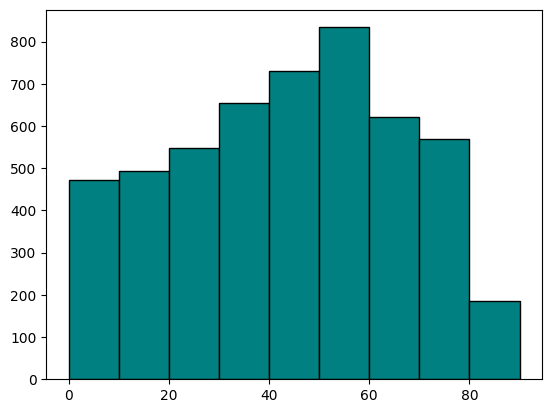

In [53]:
plt.hist(stroke_dataset.age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90], color = "teal", edgecolor = "black")
plt.show()

The gender distribution

There are more female patients than the male patients.

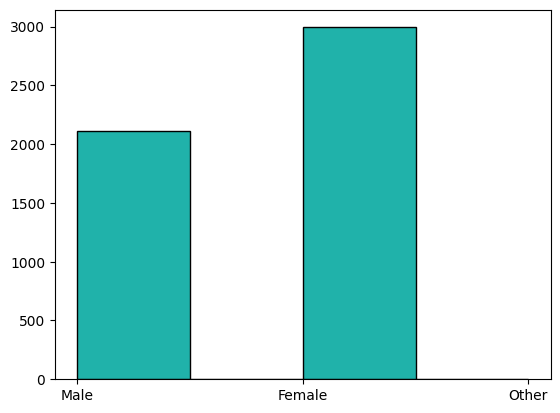

In [57]:
plt.hist(stroke_dataset.gender, bins = 4, color = "lightseagreen", edgecolor = "black")
plt.show()

#### Comparing age and gender with the stroke

Age distribution of the people who had stroke before.

From the histogram, it can be noted that almost all of the patients who had stroke are above 40 years in age with some exceptions and mojority of the patients are above 70 years.

Text(0.5, 1.0, 'Age distribution of stroke patients')

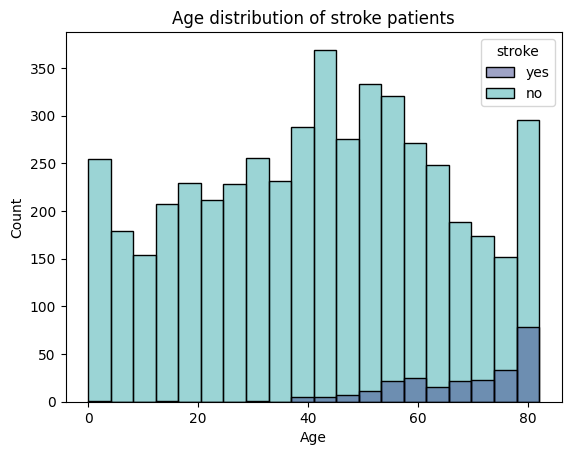

In [58]:
sns.histplot(data = stroke_dataset, x = 'age', hue = 'stroke', palette = "mako")
plt.xlabel("Age")
plt.title("Age distribution of stroke patients")

The gender distribution of the patients.

Grouping the stroke patients according to their gender.

In [33]:
gender_stroke_dist = stroke_dataset.groupby(['gender', 'stroke']).size().unstack()
gender_stroke_dist

stroke,no,yes
gender,,
Female,2853.0,141.0
Male,2007.0,108.0
Other,1.0,NaN


This table shows that although, the stroke frequency is overall low in male and female , still more number of females had stroke than males.

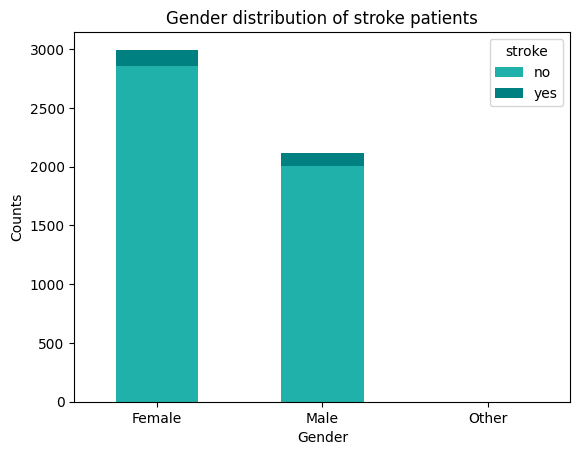

In [36]:
gender_dist_plot = gender_stroke_dist.plot.bar(stacked = True, color = ["lightseagreen", "teal"], title="Gender distribution of stroke patients")
plt.xlabel("Gender")
plt.ylabel("Counts")
plt.xticks(rotation=0)
plt.show()

Analyzing the effect of hypertension and heart disease on the stroke

In [41]:
hyper_stroke_dist = stroke_dataset.groupby(['hypertension','heart_disease','stroke']).size().unstack()
hyper_stroke_dist

stroke                        no  yes
hypertension heart_disease           
no           no             4251  149
             yes             178   34
yes          no              381   53
             yes              51   13

This table shows that only 13 stroke ptients have hypertension and heart disease both whereas 34 stroke patients only have heart disease and around 66 stroke patients have only hypertension.

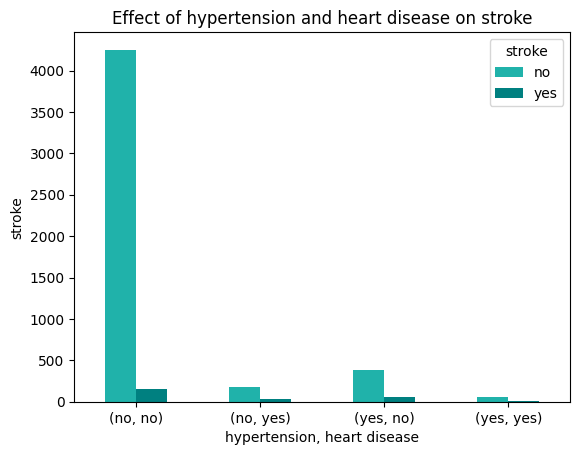

In [43]:
stroke_barplot = hyper_stroke_dist.plot.bar(color = ["lightseagreen", "teal"], title = "Effect of hypertension and heart disease on stroke")
plt.xlabel("hypertension, heart disease")
plt.ylabel("stroke")
plt.xticks(rotation = 0)
plt.show()

Analyzing the smoking habit with stroke

In [46]:
print(stroke_dataset.smoking_status.value_counts(normalize = False))

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


This data shows that majority of stroke patients have never smoked before. Only 885 people have smoked before and 789 are currently smoking.

Text(0.5, 1.0, 'Stroke count by smoking status')

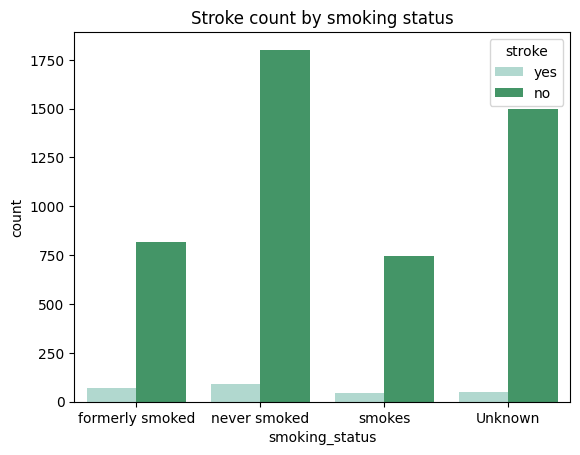

In [50]:
sns.countplot(data = stroke_dataset, x = "smoking_status", hue = "stroke", palette = "BuGn")
plt.title('Stroke count by smoking status')

# Discussion

In this assignment, I examined the dataset of stroke prediction and analyzed the relationship between patient's age, gender, and some health conditions like hypertension, heart disease and smoking habits with the stroke. In conclusion, the exploratory analysis suggests that there is not any high correlation between stroke and most of the other components. Although, the age has high correlation with the stroke as the likelihood of getting a stroke increases with the increase in age and also more females have stroke than males. Other factors like hypertension, heart disease and smoking habits have small correlation with the stroke. According to this study, everyone and specially senior citizens should take their health more seriously and make an effort to lead healthy lives.

# References

1. Stroke Dataset source - https://www.kaggle.com/datasets
2. Seaborn for data visualization
3. Matplotlib for data visualixation
4. Pandas for data manipulation
5. Seaborn color pallettes - https://medium.com/@morganjonesartist/color-guide-to-seaborn-palettes-da849406d44f